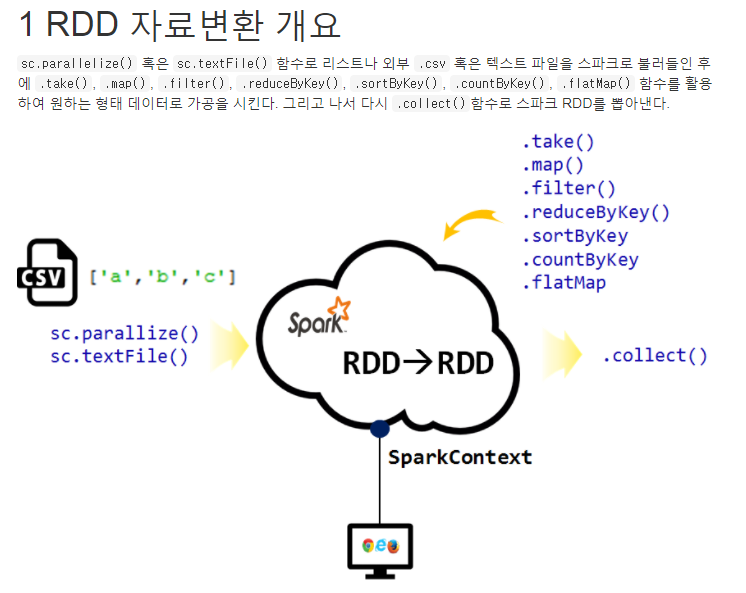

# rdd 변환기초

- 리스트 RDD 변환
    - 파이썬 리스트 데이터 객체를 스파크 RDD로 클러스터에 올린 후에 .map() 함수로 연산작업을 수행한다. 그리고 나서 다시 스파크에서 파이썬으로 RDD 객체를 빼내는데 .collect() 함수를 사용해서 가져온다

- 외부 데이터  리스트 RDD변환
    - .csv 데이터를 sc.textFile() 함수로 불러와서 RDD 객체로 변환시킨다.
    - 람다함수등으로 추출변환등을 하여 새로운 RDD객체를 생성 

- 파이썬 딕셔너리 활용
 
     -튜플 리스트로 데이터가 준비된 경우 각 정당별(key) 득표수(value)에 대한 합을 구하는 경우, 
    스파크 클러스터를 활용하지 않고 데이터가 작은 경우 defaultdict() 함수를 활용해서 계산하는 것이 가능하다.

In [ ]:
from collections import defaultdict
# 튜플 리스트
party_list = [('민주당',1), ('바른미래',2), ('자유한국',3), ('민주당',30), ('바른미래',20), ('자유한국',10)]
party_dict = defaultdict(int)
# 정당별 합을 구하는 과정
for party, vote in party_list:
    party_dict[party] += vote
# 정당별 합을 출력
for party, vote in party_dict.items():
    print(party, ":", vote)

In [ ]:
민주당 : 31
바른미래 : 22
자유한국 : 13

In [ ]:
- 스파크 RDD reduceByKey() 함수
    -튜플 리스트를 스파크에 넣어 RDD로 변환시킨 후에 reduceByKey()함수를 사용해서 키값을
    기준으로 값(Value)에 대한 연산작업을 수월히 수행할 수 있다.

In [ ]:
party_rdd = sc.parallelize(party_list)

# 정당별 총합 계산
party_total_rdd = party_rdd.reduceByKey(lambda x, y: x+y).sortByKey(ascending=True)

# 정당별 총합을 계산하고 내림차순으로 정렬
for num in party_total_rdd.collect():
  print(num)

In [ ]:
# 출력결과 -------------
('민주당', 31)
('바른미래', 22)
('자유한국', 13)

In [ ]:
- 판다스 데이터프레임 변환
    -튜플 리스트를 pd.DataFrame() 함수로 판다스 데이터프레임으로 변환을 시킨 후에 
    groupby() 연산을 사용해서 정당별 득표수 합을 구한다

In [ ]:
import pandas as pd
party_df = pd.DataFrame(party_list, columns=['party', 'vote'])
print(party_df.groupby('party').sum())

In [ ]:
      vote
party      
민주당      31
바른미래     22
자유한국     13

# 원스텝더!
텍스트 리스트를 sc.parallelize() 함수로 데이터를 가져온다. 그리고 나서 type() 명령어로 자료형이 RDD라는 사실을 확인한다.
sc.textFile() 함수로 외부 .csv 데이터를 가져올 경우 minPartitions인자를 설정하여 원본 데이터, 
즉 빅데이터를 몇조각으로 나눌지 지정할 수 있다.

In [ ]:
 단어 리스트를 바탕으로 RDD 객체 생성
list_rdd = sc.parallelize(["빅데이터는", "스파크로", "스몰 데이터는", "데이터프레임으로"])
# RDD 자료형 확인
print("RDD 자료형: ", type(list_rdd))

# 단어 리스트를 바탕으로 파티션 반영 RDD 객체 생성
iris_partition_rdd = sc.textFile("data/iris.csv", minPartitions=3)
# RDD 자료형 확인
print("RDD 자료형: ", type(iris_partition_rdd), "\n파티션 갯수:", iris_partition_rdd.getNumPartitions())

In [ ]:
# 출력결과 -----------------------
The type of RDD is <class 'pyspark.rdd.RDD'>

# 출력결과 -----------------------
RDD 자료형:  <class 'pyspark.rdd.RDD'> 
파티션 갯수: 3

In [ ]:
실수업내용

In [ ]:
dd01 = sc.range(0, 1000, 1, 2)
# 객체
rdd01
# 파티션 갯수 확인
rdd01.getNumPartitions()
# 출력
rdd01.collect()
rdd01.take(5)

# 홀수만
rdd02 = rdd01.filter(lambda x: x%2)
# 짝수만
rdd03 = rdd01.filter(lambda x: not x%2)

In [ ]:
# pyspark에서중 rdd에서 가장 기본이 되는 연산은 transformation 과 action

In [ ]:
transformation은 형태를 바꾸고  마지막에 action 은 실행을 해서 값을 도출

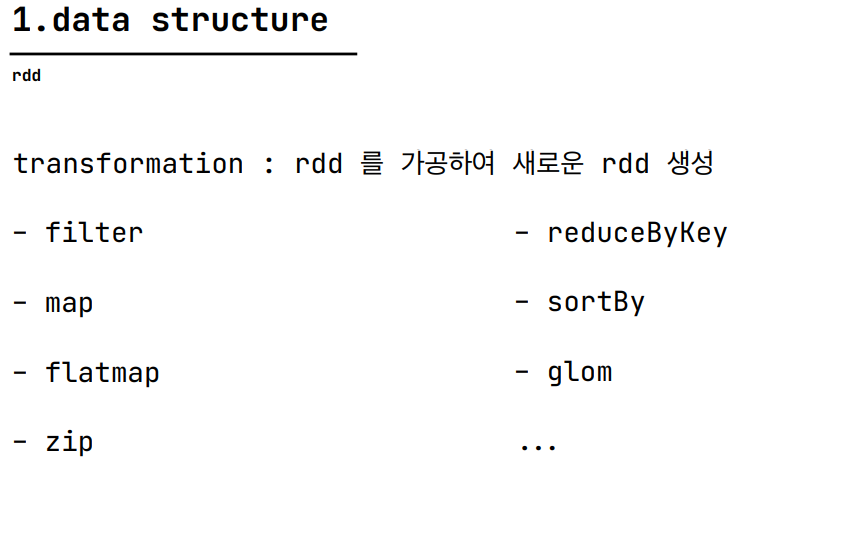

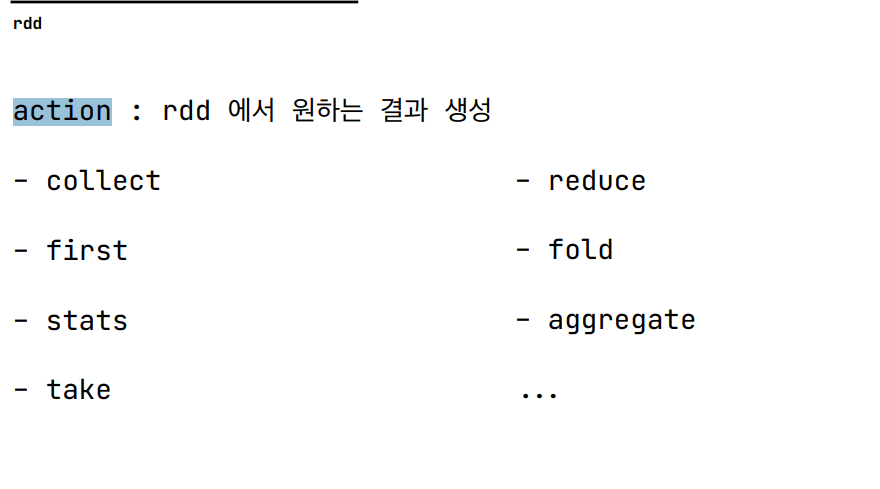

In [ ]:
https://spark.apache.org/docs/latest/api/python/reference/pyspark.html
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html#pyspark.RDD
--->전부다  transformation,action 함수들임
rdd에 관한 메뉴얼 꼭 정독해보자.!!

In [ ]:
countries = ["korea", "united states america", "united kingdom", "japan", "germany", "france", "canada", "italy", "korea"]

In [ ]:
g8 = sc.parallelize(countries, 2)  

#sc.parallelize 외부 리스트를 스파크로 보내는 함

#sc.parallelize() 함수: 파이썬 리스트를 스파크 클러스터로 가져온다
#파이썬 리스트가 스파크 RDD로 변환된 것을 확인할 수 있다.

g8.count()
g8.collect()
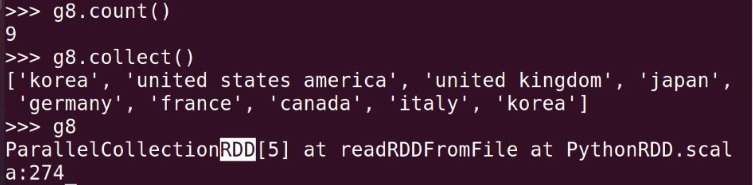

In [ ]:
# transformation
g8 = g8.distinct()
# distinct 중복제거

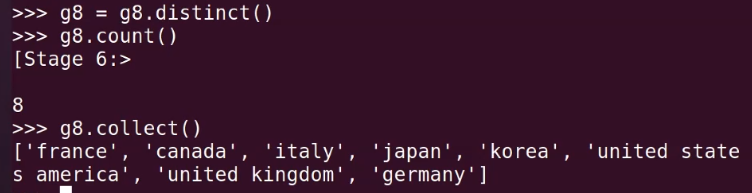

In [ ]:
# collect 함수: 스파크에서 파이썬으로 RDD 객체를 뺴내는데 사용

In [ ]:
# 각각의 원소에 적용하라고 하는 명령어 : map
g8_upper = g8.map(lambda x: x.upper())
g8_upper.collect()


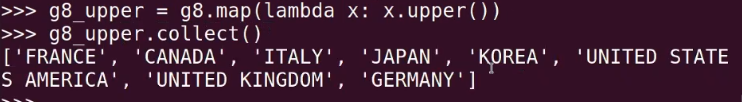

In [ ]:
g8_list01 = g8.map(lambda x: list(x))
g8_list01.collect()

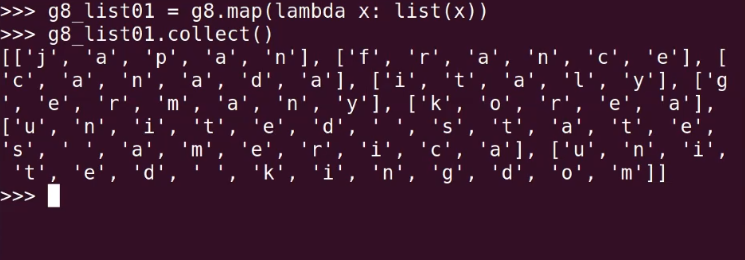

In [ ]:
# flatMap : 전체 요소에 적용하라고 하는 명령어
g8_list02 = g8.flatMap(lambda x: list(x))
g8_list02.collect()

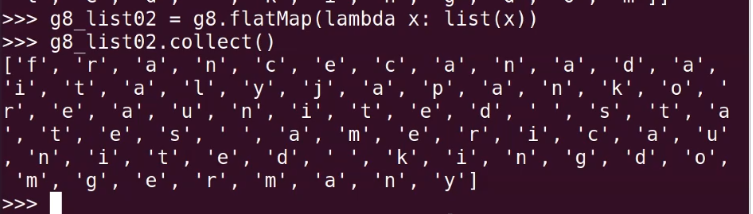

In [ ]:
# 똑같은 크기로 묶어주는함수 zip

counting = sc.range(1, 9, 1, 2)
counting_g8 = counting.zip(g8)
counting_g8.collect()

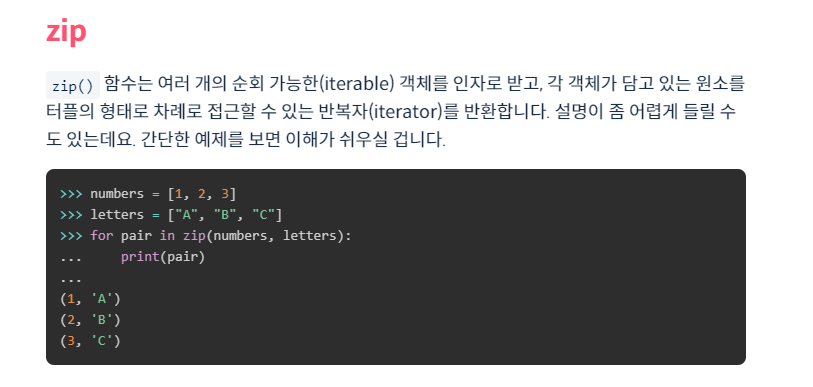
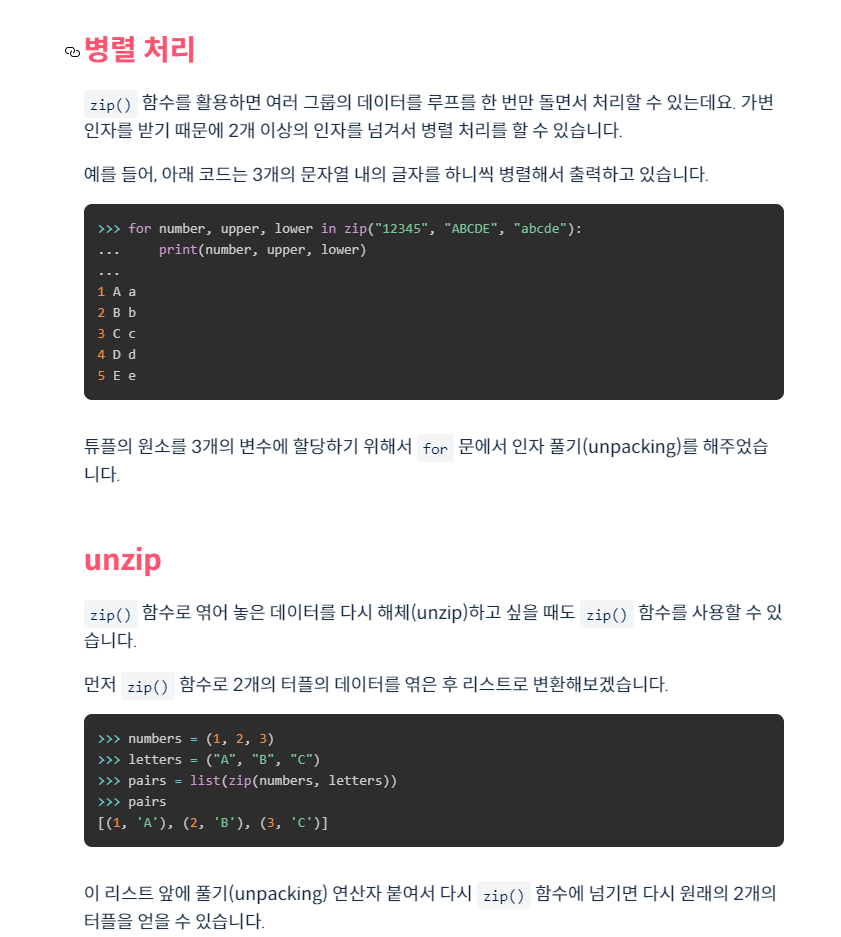
https://www.daleseo.com/python-zip/

In [ ]:

score = [("kang", 10), ("you", 30), ("kang", 20), ("shin", 60), ("you", 100)]
score_rdd = sc.parallelize(score, 2)  #SCORE데이터를 2개의 파티션으로 분할
score_rdd


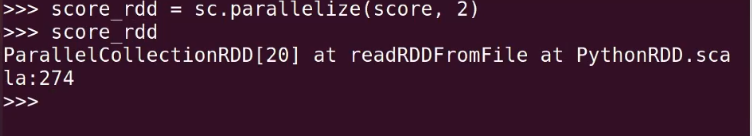

In [ ]:
페어 RDD
페어 RDD란 key-value쌍으로 이루어진 RDD를 말합니다.

파이썬 에서는 Tuple로 이뤄진 RDD가 곧 페어 RDD가 됩니다.

In [ ]:
추가설명자료!)

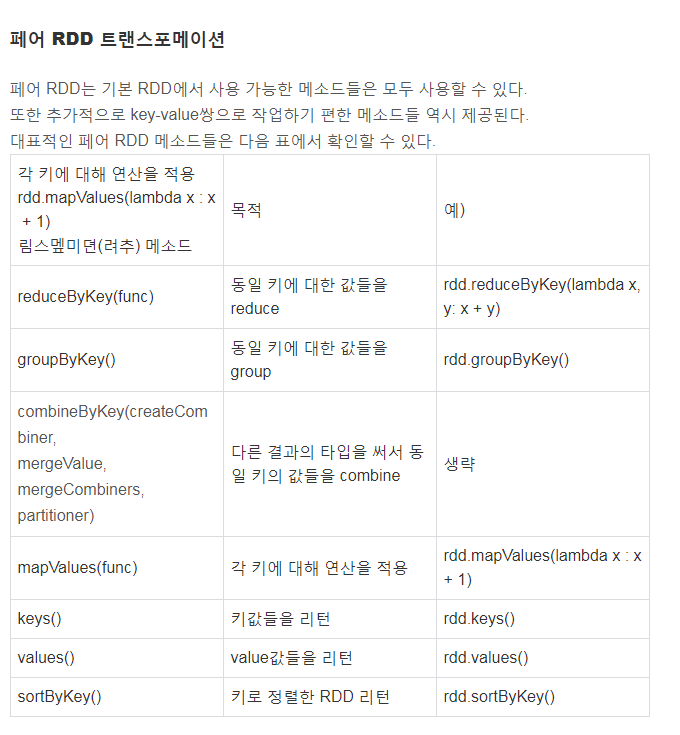
https://jyoondev.tistory.com/86

In [ ]:
score_rdd_sum = score_rdd.reduceByKey(lambda x, y: x + y)
score_rdd_sum.collect()

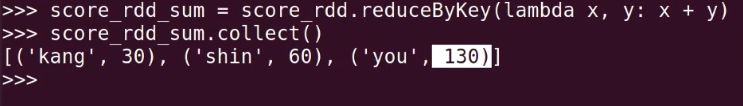

In [ ]:
예시!)


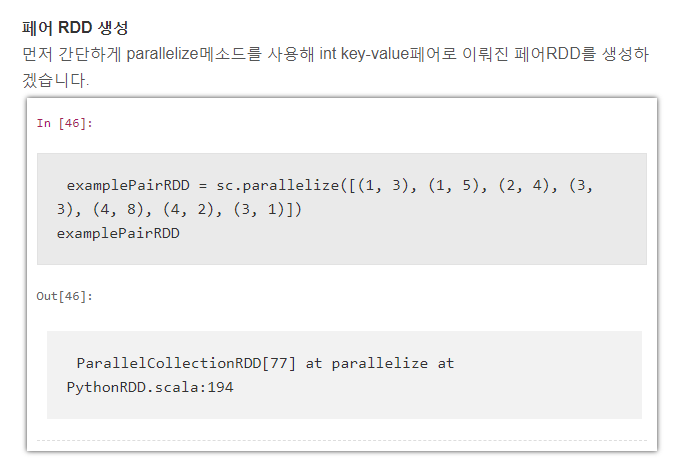
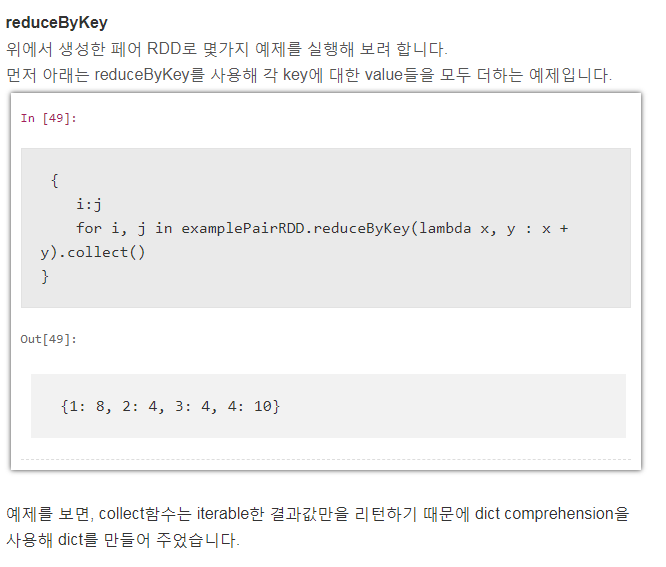

In [ ]:
nums = sc.parallelize([1, 3, 2, 1, 5, 4, 6, 7], 2)
nums.sortBy(lambda x: x).collect()  # sortBy 정렬


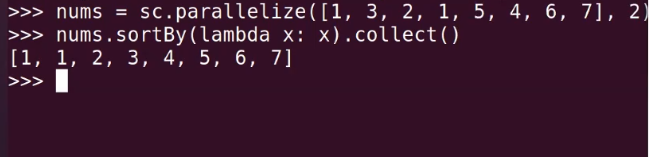

In [ ]:
arr = g8.glom()  # 파티션별로 갯수를 맞춰서 정리해주는 함수
arr.collect()


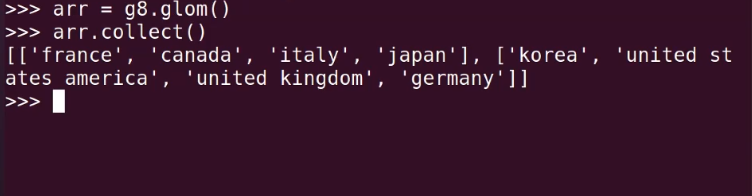

In [ ]:
4.2.4.2 파티션의 데이터를 수집하는 glom 변환 연산자

움켜잡다는 뜻의 glom 연산자는 각 파티션의 모든 요소를 배열 하나로 모으고, 
이 배열들을 요소로 포함하는 새로운 RDD를 반환한다.
따라서 새로운 RDD에 포함된 요소 개수는 이 RDD의 파티션 개수와 동일하다. 
glom연산자는 기존의 Partitioner를 제거한다.

다음과 같이 무작위로 생성한 데이터에 glom 연산자를 호출해 보자.

scala> val list = List.fill(500)(scala.util.Random.nextInt(100))
list: List[Int] = List(88, 59, 78, 94, 34, 47, 49, 31, 84, 47, ...)
scala> val rdd = sc.parallelize(list, 30).glom()
rdd: org.apache.spark.rdd.RDD[Array[Int]] = MapPartitionsRDD[0]
scala> rdd.collect()
res0: Array[Array[Int]] = Array(Array(88, 59, 78, 94,...), ...)
scala> rdd.count()
res1: Long = 30
 

이 코드는 파티션 30개에 분산된 RDD를 생성한 후 glom 연산자를 호출한다. 
출력 결과를 살펴보면 glom이 반환한 RDD 요소는 각 파티션의 데이터로 구성된 배열이며,
배열 객체의 개수 또한 30개라는 것을 알 수 있다.

glom을 잘 활용하면 RDD를 손쉽게 단일 배열로 만들 수 있다. 우선 RDD의 파티션 개수를
한 개로 만든 후 glom을 호출하면 기존 RDD의 모든 요소를 포함한 단일 배열이 
RDD 형태로 반환된다. 물론 모든 요소를 단일 파티션에 저장할 수 있을 만큼 데이터가
충분히 작아야 한다.